In [2]:
%load_ext autoreload
%autoreload 2

import os
import glob
import pathlib
import sys
import argparse
import warnings
import h5py
import numpy as np
import yt
import matplotlib
import time
#sys.path.append("/Users/atonement0721/Desktop/cbd/vis/python/")
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from matplotlib import rcParams
import multiprocessing
from multiprocessing import Process, Lock, Array
plt.style.use('ncr-paper.mplstyle')
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Computer Modern Sans Serif"]})



In [7]:
data_dir = "../BH_ac_gcc/plt06053"
# data_dir = "../BH_ac_gcc/plt37695"
# data_dir = "../BH_ac_gcc/chk04000"
# data_dir = "/Users/hyw/Desktop/ERM/GReX/Problems/FUKA_BH_accretion/plt04404"

fields_test = [("RHOSTAR"),("BX"),("BY"),("BZ"),("EPS")]
#fields_all =[("RHOSTAR") ,("TAUENERGY") ,("STX") ,("STY") ,("STZ") ,("YESTAR") ,("SSTAR") ,
#         ("BX") ,("BY") ,("BZ") ,("PHI") ,("ALPHA") ,("BETAX") ,("BETAY") ,("BETAZ") ,
#        #  ("W") ,("GTXX") ,("GTXY") ,("GTXZ") ,("GTYY") ,("GTYZ") ,("GTZZ") ,
#        #  ("ATXX") ,("ATXY") ,("ATXZ") ,("ATYY") ,("ATYZ") ,("ATZZ") ,
#         ("TRK") ,("RHOB") ,("EPS") ,("WVX") ,("WVY") ,("WVZ") ,("YE") ,("SENTROPY")]



yt : [INFO     ] 2024-01-04 11:38:36,638 Parameters: current_time              = 1470.01953125
yt : [INFO     ] 2024-01-04 11:38:36,639 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-01-04 11:38:36,639 Parameters: domain_left_edge          = [-100. -100. -100.]
yt : [INFO     ] 2024-01-04 11:38:36,639 Parameters: domain_right_edge         = [100. 100. 100.]


[512 512 512]


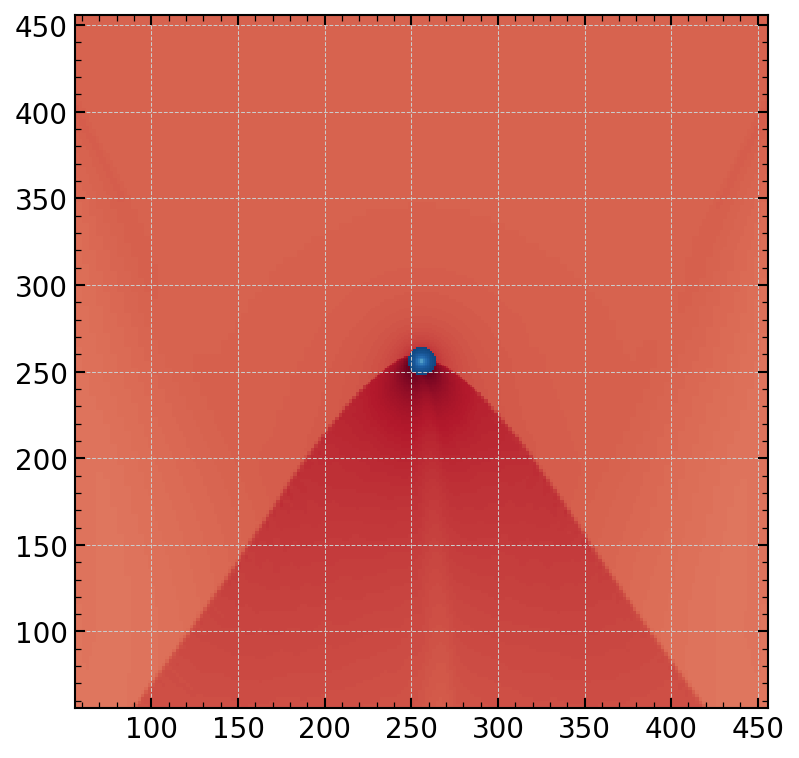

In [8]:
ds = yt.load(data_dir)

max_level = ds.index.max_level

ref = int(np.prod(ds.ref_factors[0:max_level]))
low = ds.domain_left_edge
dims = ds.domain_dimensions * ref
nx, ny, nz = dims
print(dims)

cube = ds.covering_grid(max_level, left_edge=low, dims=dims, fields=fields_test)


rho = cube[("RHOSTAR")].d
bx = cube[("BX")].d
by = cube[("BY")].d
bz = cube[("BZ")].d
eps = cube[("EPS")].d
# rho = cube[irho].d
# u = cube[iu].d
nx, ny, nz = rho.shape
boxl=200

fig, ax = plt.subplots(dpi=150)

plt.pcolormesh(rho[:,:,nz//2], cmap="RdBu_r",norm=colors.LogNorm())
plt.xlim(nx//2-boxl, nx//2+boxl)
plt.ylim(ny//2-boxl, ny//2+boxl)
ax.set_aspect('equal')


In [43]:
ds['STX']

KeyError: 'STX'

In [ ]:

region = ds.all_data()
seed_points = [region.center]
field = "BZ"  

# Calculate streamlines
# streamlines = yt.streamlines.Streamlines(ds, seed_points, field)

# Plot the streamlines
fig, ax = plt.subplots(figsize=(8, 8))

plt.streamplot(x,y,bx,by)


In [31]:
print(seed_points)

[unyt_array([0., 0., 0.], 'code_length')]


yt : [INFO     ] 2024-01-04 11:38:43,598 Parameters: current_time              = 1470.01953125
yt : [INFO     ] 2024-01-04 11:38:43,598 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-01-04 11:38:43,599 Parameters: domain_left_edge          = [-100. -100. -100.]
yt : [INFO     ] 2024-01-04 11:38:43,599 Parameters: domain_right_edge         = [100. 100. 100.]


[512 512 512]


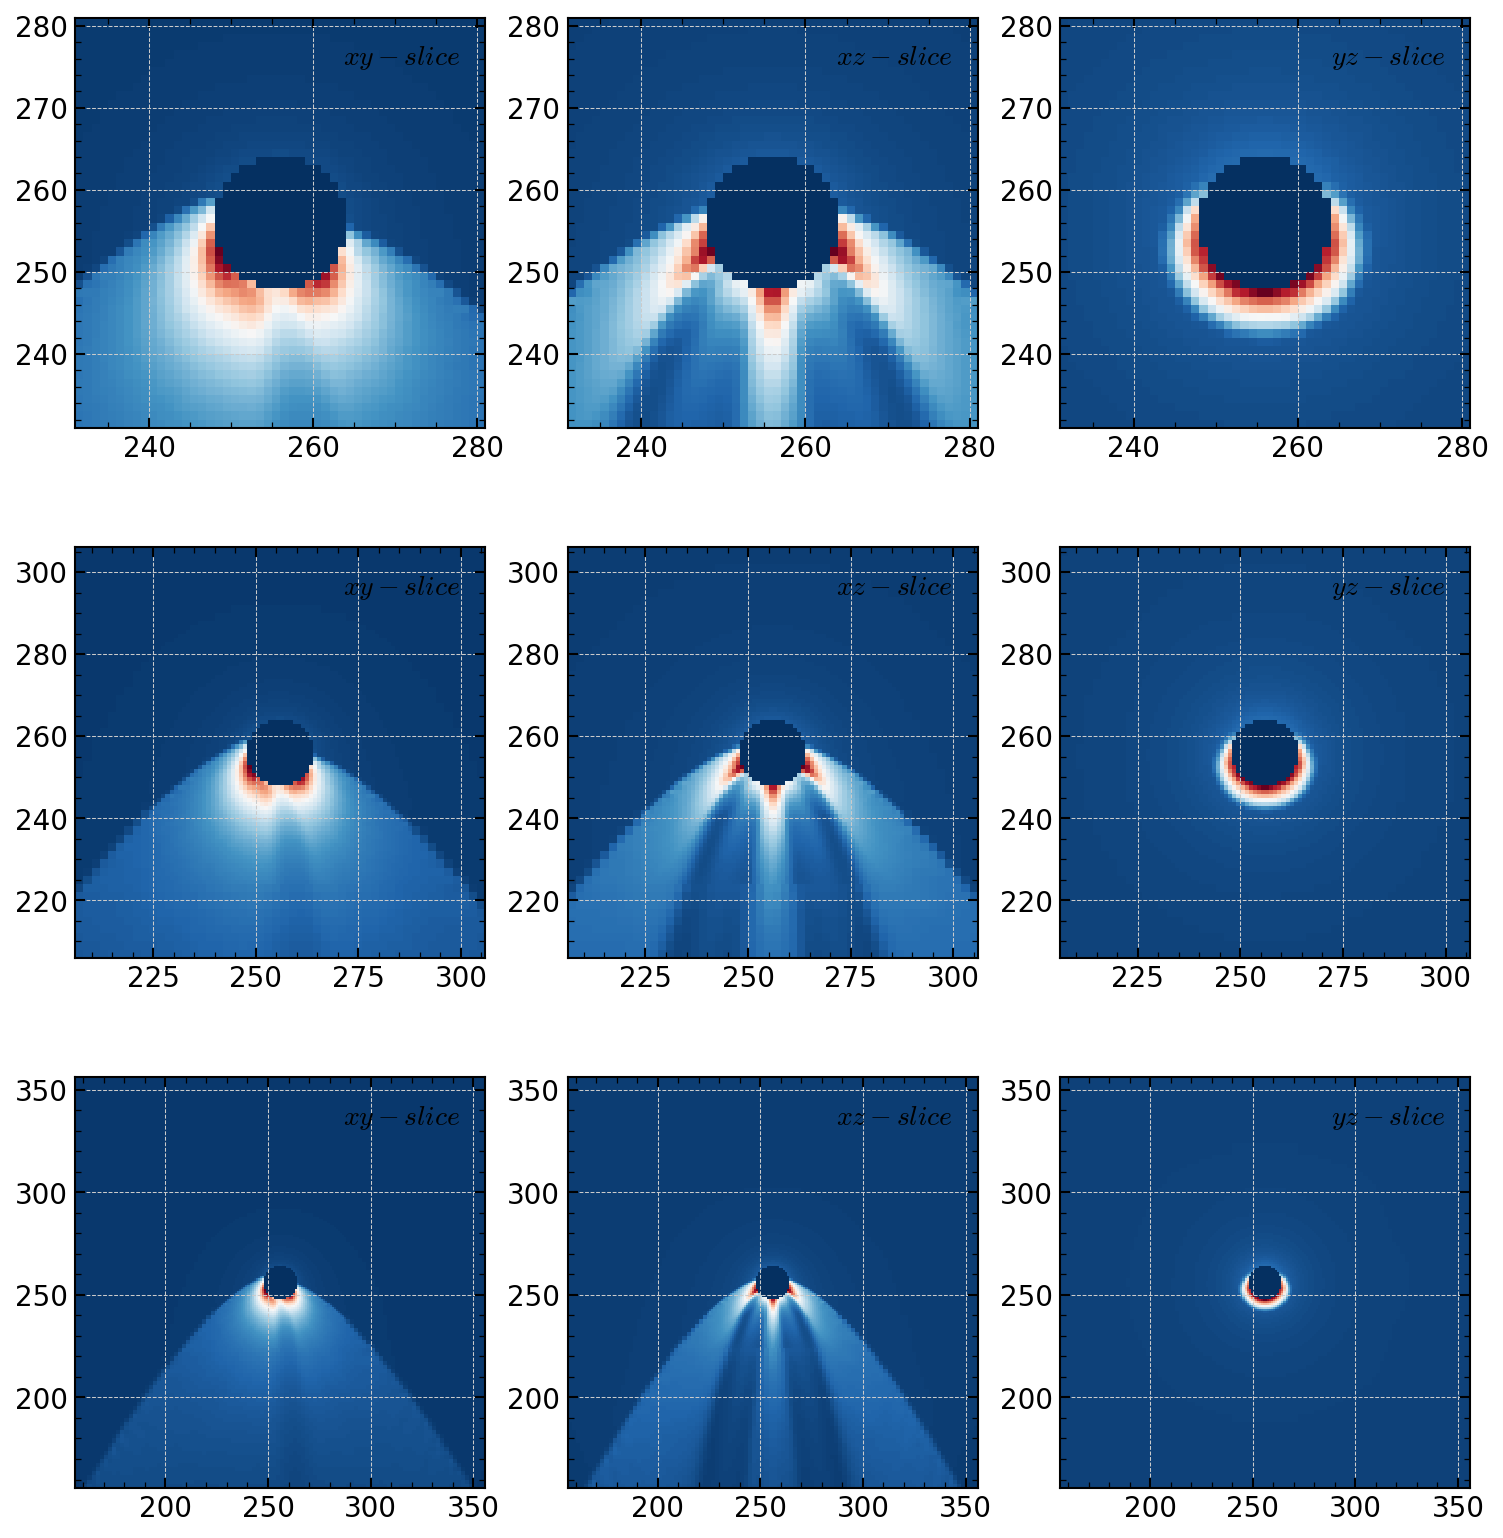

In [9]:
ds = yt.load(data_dir)

max_level = ds.index.max_level

ref = int(np.prod(ds.ref_factors[0:max_level]))
low = ds.domain_left_edge
dims = ds.domain_dimensions * ref
nx, ny, nz = dims
print(dims)

cube = ds.covering_grid(max_level, left_edge=low, dims=dims, fields=fields_test)

rho = cube[("RHOSTAR")].d
# rho = cube[("RHOB")].d
# rho = cube[irho].d
# u = cube[iu].d
nx, ny, nz = rho.shape
boxl=150

fig, ax = plt.subplots(3,3,figsize=(12,13),dpi=150)

for irow, boxl in enumerate([25,50,100]):
    
    ax[irow,0].pcolormesh(rho[:,:,nz//2], cmap="RdBu_r",norm=colors.Normalize())
    ax[irow,0].set_xlim(nx//2-boxl, nx//2+boxl)
    ax[irow,0].set_ylim(ny//2-boxl, ny//2+boxl)
    ax[irow,0].set_aspect('equal')

    patch = mpatches.Patch(color=None, alpha=0.0,label=r'$xy-slice$')
    ax[irow,0].legend(handles=[patch],frameon=False)
    

    ax[irow,1].pcolormesh(rho[:,ny//2,:], cmap="RdBu_r",norm=colors.Normalize())
    ax[irow,1].set_xlim(nx//2-boxl, nx//2+boxl)
    ax[irow,1].set_ylim(ny//2-boxl, ny//2+boxl)
    ax[irow,1].set_aspect('equal')

    patch = mpatches.Patch(color=None, alpha=0.0,label=r'$xz-slice$')
    ax[irow,1].legend(handles=[patch],frameon=False)

    ax[irow,2].pcolormesh(rho[nx//2,:,:], cmap="RdBu_r",norm=colors.Normalize())
    ax[irow,2].set_xlim(nx//2-boxl, nx//2+boxl)
    ax[irow,2].set_ylim(ny//2-boxl, ny//2+boxl)
    ax[irow,2].set_aspect('equal')

    patch = mpatches.Patch(color=None, alpha=0.0,label=r'$yz-slice$')
    ax[irow,2].legend(handles=[patch],frameon=False)


In [ ]:
outdir ="./BHL-test/"

RRange = 5
Rticks = [-4,-2,0,2,4]
Rticklabels = [r'${%d}$'%i for ii, i in enumerate(Rticks)]

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
# from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure( figsize = (13.7,7.2),dpi=75 )
gs = GridSpec(nrows=5, ncols=10, 
              wspace=0.00, hspace=0.00, 
              width_ratios=[0.08,0.45, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.08], 
              height_ratios=[1.0, 1.0, 1.0, 0.35, 0.08])

ax_figDen = np.array([[fig.add_subplot(gs[j,i]) for ii,i in enumerate([2,3,4,5,6,7])] for jj,j in enumerate([0])])
ax_figDen = ax_figDen.flatten()

ax_figTemp = np.array([[fig.add_subplot(gs[j,i]) for ii,i in enumerate([2,3,4,5,6,7])] for jj,j in enumerate([1])])
ax_figTemp = ax_figTemp.flatten()

ax_figNu = np.array([[fig.add_subplot(gs[j,i]) for ii,i in enumerate([2,3,4,5,6,7])] for jj,j in enumerate([2])])
ax_figNu = ax_figNu.flatten()

ax_cbarDen = fig.add_subplot(gs[:-2,0])
ax_cbarTemp = fig.add_subplot(gs[:-2,9])
ax_cbarNu = fig.add_subplot(gs[4,2:-2])
        
fig_ID = 0

for ibeta, beta in enumerate(betavalue):
    
    ID = "t"+str(run[0])+"n"+str(run[1])+"b"+str(beta)
    FigID = "t"+str((int)(run[0]+1))+"n"+str((int)(run[1]+1))+"b"+str(beta)
    
    
    x, y = np.meshgrid(x_dat, y_dat)
    ax = np.array([ax_figDen[fig_ID],ax_figTemp[fig_ID],ax_figNu[fig_ID]])
    print(fig_ID,end=' ')
    fig_ID = fig_ID + 1
    sys.stdout.flush()
    
    imDen = ax[0].pcolormesh(x,y,rho[ibeta,irun,...]  ,cmap='RdBu_r',norm=colors.LogNorm(vmin=vminDen, vmax=vmaxDen))
    imTemp= ax[1].pcolormesh(x,y,temp[ibeta,irun,...] ,cmap='RdBu_r',norm=colors.LogNorm(vmin=vminTemp, vmax=vmaxTemp))
    imNu  = ax[2].pcolormesh(x,y,Nu[ibeta,irun,...]   ,cmap='RdBu_r',norm=colors.LogNorm(vmin=vminNu, vmax=vmaxNu))
    for i in range(3):
        ax[i].set_xlim(-RRange,RRange)
        ax[i].set_ylim(-RRange,RRange)
        ax[i].set_xticks(Rticks)
        ax[i].set_xticklabels([])
        ax[i].set_yticks(Rticks)
        ax[i].set_yticklabels([])
        ax[i].set_aspect("equal")

for i in range((int)(len(ax_figNu))):        
    ax_figNu[i].set_xticklabels(Rticklabels)
    
betatitle = [r'$\beta={%.1f}$'%beta for ibeta, beta in enumerate(betavalue)]
    
for i in range(6):
    ax_figDen[i].set_title(betatitle[i])
    
ax_figDen[0].set_ylabel(r'$\Sigma$',fontsize=18)
ax_figTemp[0].set_ylabel(r'$T$',fontsize=18)
ax_figNu[0].set_ylabel(r'$\nu$',fontsize=18)
  
cax = np.array([ax_cbarDen ,ax_cbarTemp ,ax_cbarNu])

cbarDen  = plt.colorbar(imDen  ,cax=cax[0])
cbarTemp = plt.colorbar(imTemp ,cax=cax[1])
cbarNu   = plt.colorbar(imNu   ,cax=cax[2],orientation='horizontal')

cax[0].set_title(r'$\Sigma$',fontsize=18)
cax[1].set_title(r'$T$',fontsize=18) 
cax[2].set_title(r'$\nu$',fontsize=18)

plt.savefig(outdir+"r-Gallery-subset4.png",dpi=550,bbox_inches = 'tight', pad_inches=0.05,transparent=True)